<h1 align="center"><span style='font-family:sans-serif'>Heart Failure Prediction</h1>

<h3 align="center"><span style='font-family:sans-serif'>Prepared by Group 8</h3>

### Problem Definition
* How can we forecast an individual's chances of developing heart disease based on the patient's medical records as well as other patients' prior similar medical heart-related data ? 
* What are the leading factors that contribute to heart failure in patients ?

### The Data

##### About the Dataset : 
My team and I choose the *Heart Failure Prediction Dataset* from Kaggle. It can be found here https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction.

##### The Attributes: 

1. **Age**: age of the patient in years
2. **Sex**: sex of the patient, M: Male, F: Female]
3. **ChestPainType**: chest pain type, TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
4. **RestingBP**: resting blood pressure, mm Hg
5. **Cholesterol**: serum cholesterol, mm/dl
6. **FastingBS**: fasting blood sugar, 1: if FastingBS > 120 mg/dl, 0: otherwise
7. **RestingECG**: resting electrocardiogram results, Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria) 
8. **MaxHR**: maximum heart rate achieved, Numeric value between 60 and 202
9. **ExerciseAngina**: exercise-induced angina , Y: Yes, N: No
10. **Oldpeak**: oldpeak = ST , Numeric value measured in depression
11. **ST_Slope**: the slope of the peak exercise ST segment, Up: upsloping, Flat: flat, Down: downsloping
12. **HeartDisease**: output class, 1: heart disease, 0: Normal

### Data Preparation

In [1]:
# importing necessary libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = "svg"

In [2]:
# loading the data

data = pd.read_csv('heart.csv')

### Data Exploration and Wrangling

In [3]:
# looking at the features

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Our dataset comprises of 918 points and 12 columns, with 'HeartDisease' as our target column and the others being clinical features.
Objects, integers, and floats are datatypes that represent categories, discrete variables, and continuous variables, respectively.
The Nun-Null Count indicates that none of the columns have any missing values.

In [5]:
# Duplicates 

data.duplicated().sum()

0

In [6]:
# Distinct values/categories

data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

We have no duplicated entries and the features have distinct values/categories. 

In [7]:
# patients without heart disease at a glance 
no_disease = data[data['HeartDisease'] == 0]
no_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [8]:
# patients with heart disease at a glance
has_disease = data[data['HeartDisease'] == 1]
has_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1


At a glance, we can observe that there are striking differences between *people without disease* and *patients with disease*, for example, the `Oldpeak` in diseased patients is higher than in non-disease patients, and individuals with disease have `ExerciseAngina`, while those without disease do not. As we progress, we will delve further into these observations.

#### Descriptive summary

In [9]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In the `Age`, `RestingBP`, `Cholesterol`,`MaxHR`,
`Oldpeak` columns the mean is almost the same as the median,
the features are normally distributed. 
On average the `Age` is centered around 54 years old, with the youngest at 28 years old and oldest at 77 years old.  

In [10]:
# Distribution of the target

data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

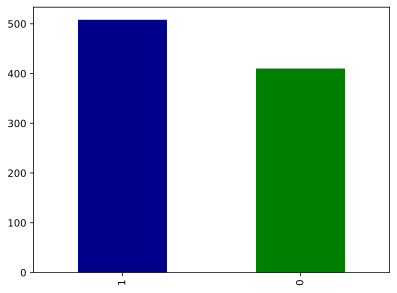

In [11]:
# Visualizing the balance

data.HeartDisease.value_counts().plot(kind = 'bar', color = ['darkblue', 'green']);

The dataset is not perfectly balanced since the number of heart disease patients is a bit larger than the number of non-disease cases.

In [12]:
# pair grid to check relationship between features

g = sns.PairGrid(data, hue='HeartDisease', palette='winter')
g.fig.set_size_inches(15,15)
g.map_lower(plt.scatter, alpha=0.6)
g.map_diag(plt.hist, alpha=0.7)
g.fig.set_size_inches(8,14);

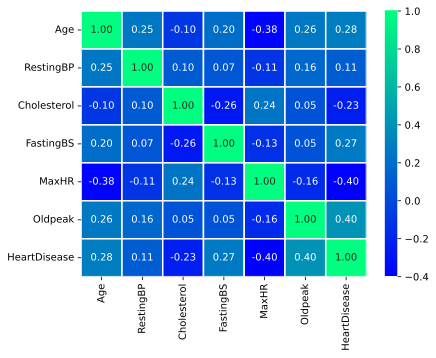

In [13]:
# heatmap to check feature correlation

sns.heatmap(data.corr(), annot=True, cmap='winter', linewidths=1.5, fmt='.2f');

Features of interest that have some relation to each other or the target column are,
`MaxHR`, `Age` and `Oldpeak`. `Age` is slightly negatively correlated to `MaxHR` at -0.38,
`MaxHR` is moderately negatively correlated to `HeartDisease` at -0.4,
while `Oldpeak` is moderately positively correlated to `HeartDisease` at 0.4

### Observations


In [14]:
# lookin at the gender

data.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [15]:
pd.crosstab(data.HeartDisease, data.Sex)

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


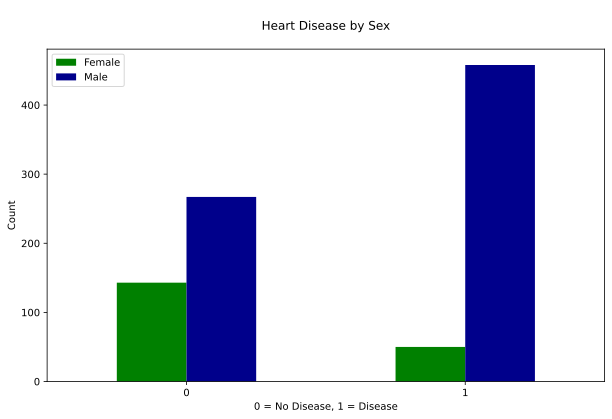

In [16]:
# cross tab plot 

pd.crosstab(data.HeartDisease, data.Sex).plot(kind='bar',
                                   figsize=(10, 6),
                                   color = ['green', 'darkblue'])
plt.title('\n Heart Disease by Sex \n')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

Males make up a larger portion of the dataset than females,
and men are more likely than women to have cardiac disease at (63.2% vs. 25.9%).

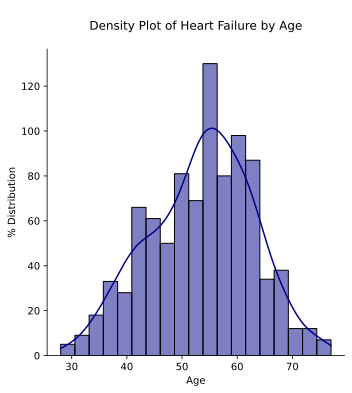

In [17]:
# Density Distribution of heart failure by age
ax=sns.displot(data.Age, kde=True, color='darkblue')
ax.set(xlabel='Age',
      ylabel='% Distribution',
      title='\n Density Plot of Heart Failure by Age \n');

The `Age` distribution is slightly skewed to the left and peaks at ~54 years.

In [18]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


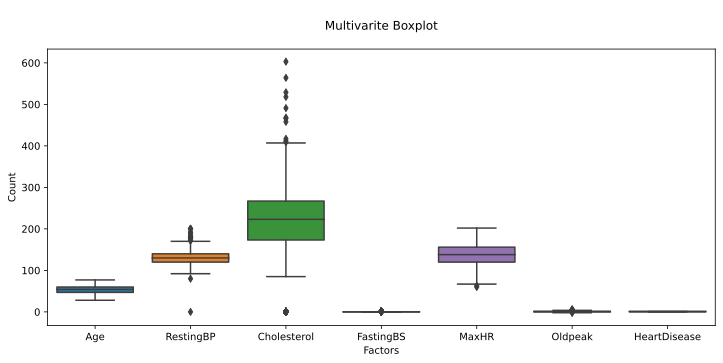

In [19]:
# Look at ouliers (with target column)
plt.figure(figsize=(12,5))
df = pd.DataFrame(data=data)
boxplot = sns.boxplot(data=df)
boxplot.set_xlabel('Factors')
boxplot.set_ylabel('Count')
boxplot.axes.set_title('\n Multivarite Boxplot \n');

With values as high as 600 and as low as 0, `Cholesterol` has the most extreme and widely spread values, which may be significant because cholesterol levels are directly related to aging and lifestyle choices. 

### Modelling

In [20]:
# Create X (all the feature columns)
X = data.drop("HeartDisease", axis=1)

# Create y (the target column)
y = data["HeartDisease"]

In [21]:
# Features of the numerical columns

num_col = [feat for feat in data.columns if data[feat].dtype != 'O']
num_col

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [22]:
# Features of the categorical columns

cat_col = [feat for feat in data.columns if data[feat].dtype == 'O']
cat_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [23]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [24]:
# Converting categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[  0. ,   1. ,   0. , ...,   0. , 172. ,   0. ],
       [  1. ,   0. ,   0. , ...,   0. , 156. ,   1. ],
       [  0. ,   1. ,   0. , ...,   0. ,  98. ,   0. ],
       ...,
       [  0. ,   1. ,   1. , ...,   0. , 115. ,   1.2],
       [  1. ,   0. ,   0. , ...,   0. , 174. ,   0. ],
       [  0. ,   1. ,   0. , ...,   0. , 173. ,   0. ]])

In [25]:
# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [26]:
# View the different shapes of the training and test datasets
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((734, 20), (184, 20), (734,), (184,))

### Modelling

In [27]:
# Choosing Classification Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

We will test multiple classifiers to better forecast the chance of heart disease because this is a supervised learning, binary classification problem.

##### Model 1 : LogisticRegression

In [28]:
# Define LogisticRegression
lr = LogisticRegression()
# Fit model
lr.fit(X_train, y_train)
# score on train
lr.score(X_train, y_train)

0.8692098092643051

In [29]:
# score on test
lr.score(X_test,y_test)

0.8532608695652174

##### Model 2 : KNearestNeighbours

In [30]:
# Define KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit model
knn.fit(X_train, y_train)
# score on train
knn.score(X_train, y_train)

0.7970027247956403

In [31]:
# score on test
knn.score(X_test,y_test)

0.7065217391304348

##### Model 3 : RandomForestClassifier

In [32]:
# Define RandomForestClassifier
rf = RandomForestClassifier()
# Fit model
rf.fit(X_train, y_train)
# score on train
rf.score(X_train, y_train)

1.0

In [33]:
# score on test
rf.score(X_test,y_test)

0.875

RandomForestClassifier is the top performing model, followed by LogisticRegression and finally KNeighborsClassifier.
We will make predictions and evaluate RandomForestClassifier, although a train score of 1.0 may indicate overfitting. However, because this is a classification case, accuracy is not a real measure of performance due to data imbalance. Below, we will look at various classification-specific metrics.

In [34]:
y_preds = rf.predict(X_test)

In [35]:
predictions = pd.DataFrame(y_preds)
predictions.head()

,0
0,0
1,1
2,1
3,1
4,0


In [36]:
# Evaluation metrics imports

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [37]:
# creating the confusion matrix 

cm= confusion_matrix(y_test, y_preds)
cm

array([[66, 11],
       [12, 95]], dtype=int64)

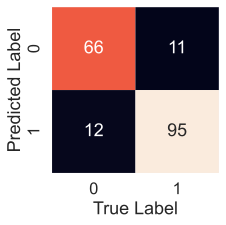

In [38]:
# Visualizing the cm

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix diagram
    using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

plot_conf_mat(y_test,y_preds)

We can find the accuracy of the predicted result by interpreting the confusion matrix. By above output, we can interpret that 66 + 95 = 161 (Correct Output) and 11 + 12 = 23 (Incorrect Output).
- This value of corrected output indicates the predicted value is relatively accurate.

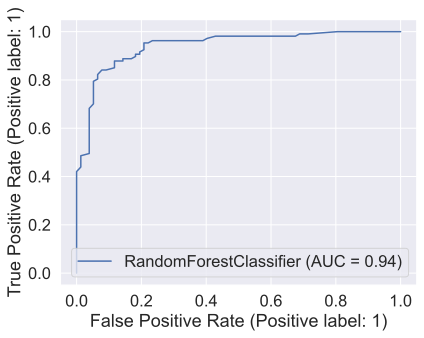

In [39]:
# Plot ROC curve and calculate AUC metric

plot_roc_curve(rf, X_test, y_test);

In [40]:
# cross validate

cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
cv_scores

array([0.89115646, 0.89115646, 0.85714286, 0.85034014, 0.84931507])

In [41]:
cv_scores.mean()

0.8678221973720994

In [42]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [43]:
accuracy_score(y_test, y_preds)

0.875

In [44]:
f1_score(y_test, y_preds)

0.892018779342723

In [45]:
recall_score(y_test, y_preds)

0.8878504672897196

In [46]:
precision_score(y_test, y_preds)

0.8962264150943396

When cross validated the mean of the 5 k folds is 0.87.
Model has AUC of 0.94 and the 'does have heart disease' scores of 88% accuracy, 90% recall, 90% precision and 89 % F1.
The scores show that the model can make good predictions of in terms of whether a patient has heart disease or not. 

### Conclusion

Men are more likely than women to have heart disease,
which may be due to the fact that there are more men in this dataset than women or that men may lead different lifestyles than women, which may increase their risk of developing heart disease.
Age, maximal heart rate, and cholesterol levels are the three main factors that cause heart disease.
Given its good evaluation ratings, the RandomForestClassifier is the preferred model for making predictions.